In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import MaxAbsScaler

In [95]:
df = pd.read_csv("../data/landslideCleaned.csv")
df['event_date'] = pd.to_datetime(df['event_date'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   event_id                   5351 non-null   int64         
 1   event_date                 5351 non-null   datetime64[ns]
 2   event_year                 5351 non-null   int64         
 3   event_month                5351 non-null   object        
 4   event_time                 5351 non-null   object        
 5   event_hour                 5351 non-null   int64         
 6   event_am_pm                5351 non-null   object        
 7   landslide_category         5351 non-null   object        
 8   landslide_trigger          5351 non-null   object        
 9   landslide_size             5351 non-null   object        
 10  landslide_setting          5351 non-null   object        
 11  fatality_count             5351 non-null   float64       
 12  injury

In [97]:
df.describe()

,event_id,event_date,event_year,event_hour,fatality_count,injury_count,admin_division_population,gazeteer_distance,longitude,latitude
count,5351.000000,5351,5351.000000,5351.000000,5351.00000,5351.000000,5.351000e+03,5351.000000,5351.000000,5351.000000
mean,8373.560643,2015-06-11 11:19:08.185385984,2014.980191,9.512614,1.92450,0.750327,6.924205e+04,9.074674,-18.667862,30.298537
min,84.000000,1988-11-07 00:00:00,1988.000000,0.000000,0.00000,0.000000,-1.000000e+00,-1.000000,-179.980766,-46.774800
25%,6996.500000,2014-09-10 11:30:00,2014.000000,0.000000,0.00000,0.000000,-1.000000e+00,-1.000000,-121.396300,21.672205
50%,8412.000000,2015-10-15 00:00:00,2015.000000,11.000000,0.00000,0.000000,2.132000e+03,3.465590,-76.623798,36.000259
75%,9829.500000,2016-10-31 02:24:00,2016.000000,16.000000,0.00000,0.000000,1.235800e+04,12.378965,84.884900,44.356750
max,11221.000000,2017-09-28 19:36:00,2017.000000,23.000000,2100.00000,374.000000,1.269184e+07,199.448930,179.991364,71.536599
std,1713.667872,NaN,2.150849,7.933967,30.89251,8.465018,4.887774e+05,15.204646,102.002689,18.810124


### Visualizing Distributions of Numerical Data

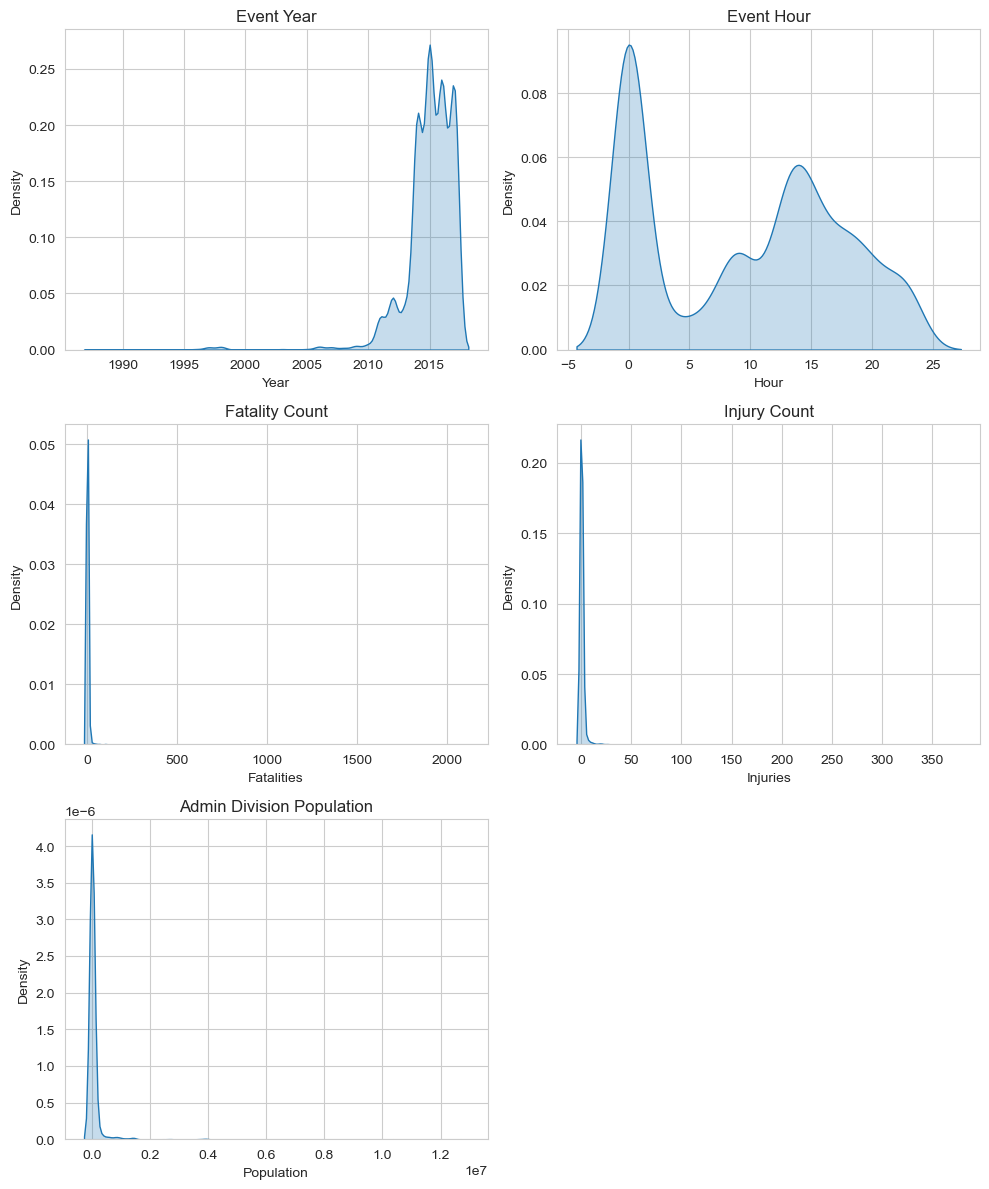

In [98]:
fig, axes = plt.subplots(3, 2, figsize = (10, 12))

sns.kdeplot(df['event_year'], ax = axes[0,0], fill = True)
axes[0,0].set_title("Event Year")
axes[0,0].set_xlabel("Year")

sns.kdeplot(df['event_hour'], ax = axes[0,1], fill = True)
axes[0,1].set_title("Event Hour")
axes[0,1].set_xlabel("Hour")

sns.kdeplot(df['fatality_count'], ax = axes[1,0], fill = True)
axes[1,0].set_title("Fatality Count")
axes[1,0].set_xlabel("Fatalities")

sns.kdeplot(df['injury_count'], ax = axes[1,1], fill = True)
axes[1,1].set_title("Injury Count")
axes[1,1].set_xlabel("Injuries")

sns.kdeplot(df['admin_division_population'], ax = axes[2,0], fill = True)
axes[2,0].set_title("Admin Division Population")
axes[2,0].set_xlabel("Population")

axes[2,1].axis('off')

plt.tight_layout()
plt.show()


In [99]:
# Calculate the skew and kurtosis of the 'fatality_count' variable
fatality_skew = stats.skew(df['fatality_count'])
fatality_kurt = stats.kurtosis(df['fatality_count'])

# Calculate the skew and kurtosis of the 'injury_count' variable
injury_skew = stats.skew(df['injury_count'])
injury_kurt = stats.kurtosis(df['injury_count'])

population_skew = stats.skew(df['admin_division_population'])
population_kurt = stats.kurtosis(df['admin_division_population'])

# Print results
print(f"Skewness of fatality_count: {round(fatality_skew, 4)}")
print(f"Kurtosis of fatality_count: {round(fatality_kurt, 4)}\n")

print(f"Skewness of injury_count: {round(injury_skew, 4)}")
print(f"Kurtosis of injury_count: {round(injury_kurt, 4)}\n")

print(f"Skewness of admin_division_population: {round(population_skew, 4)}")
print(f"Kurtosis of admin_division_population: {round(population_kurt, 4)}")

Skewness of fatality_count: 59.4789
Kurtosis of fatality_count: 3981.9643

Skewness of injury_count: 32.702
Kurtosis of injury_count: 1260.974

Skewness of admin_division_population: 17.5847
Kurtosis of admin_division_population: 377.9056


From the plot alongside the skew and kurtosis measurements we can see that the 'fatality_count', 'injury_count', and 'admin_division_population' variables have a severe positive skew along with a significant deviation from normality, therefore we will perform log transformations on these variables to eliminate this skew.

In [100]:
# Apply a log transformation to each of the three varaibles
df['fatality_count'] = np.log1p(df['fatality_count'] + 1)
df['injury_count'] = np.log1p(df['injury_count'] + 1)
df['admin_division_population'] = np.log1p(df['admin_division_population'] + 1)

In [101]:
#scaler = MaxAbsScaler().fit(df.loc[:, ['fatality_count', 'injury_count', 'admin_division_population']])
#df[['fatality_count', 'injury_count', 'admin_division_population']] = scaler.transform(df.loc[:, ['fatality_count', 'injury_count', 'admin_division_population']])

In [102]:
df.describe()

,event_id,event_date,event_year,event_hour,fatality_count,injury_count,admin_division_population,gazeteer_distance,longitude,latitude
count,5351.000000,5351,5351.000000,5351.000000,5351.000000,5351.000000,5351.000000,5351.000000,5351.000000,5351.000000
mean,8373.560643,2015-06-11 11:19:08.185385984,2014.980191,9.512614,0.890271,0.799282,6.065135,9.074674,-18.667862,30.298537
min,84.000000,1988-11-07 00:00:00,1988.000000,0.000000,0.693147,0.693147,0.000000,-1.000000,-179.980766,-46.774800
25%,6996.500000,2014-09-10 11:30:00,2014.000000,0.000000,0.693147,0.693147,0.000000,-1.000000,-121.396300,21.672205
50%,8412.000000,2015-10-15 00:00:00,2015.000000,11.000000,0.693147,0.693147,7.665753,3.465590,-76.623798,36.000259
75%,9829.500000,2016-10-31 02:24:00,2016.000000,16.000000,0.693147,0.693147,9.422221,12.378965,84.884900,44.356750
max,11221.000000,2017-09-28 19:36:00,2017.000000,23.000000,7.650645,5.929589,16.356470,199.448930,179.991364,71.536599
std,1713.667872,NaN,2.150849,7.933967,0.542523,0.390124,4.547142,15.204646,102.002689,18.810124


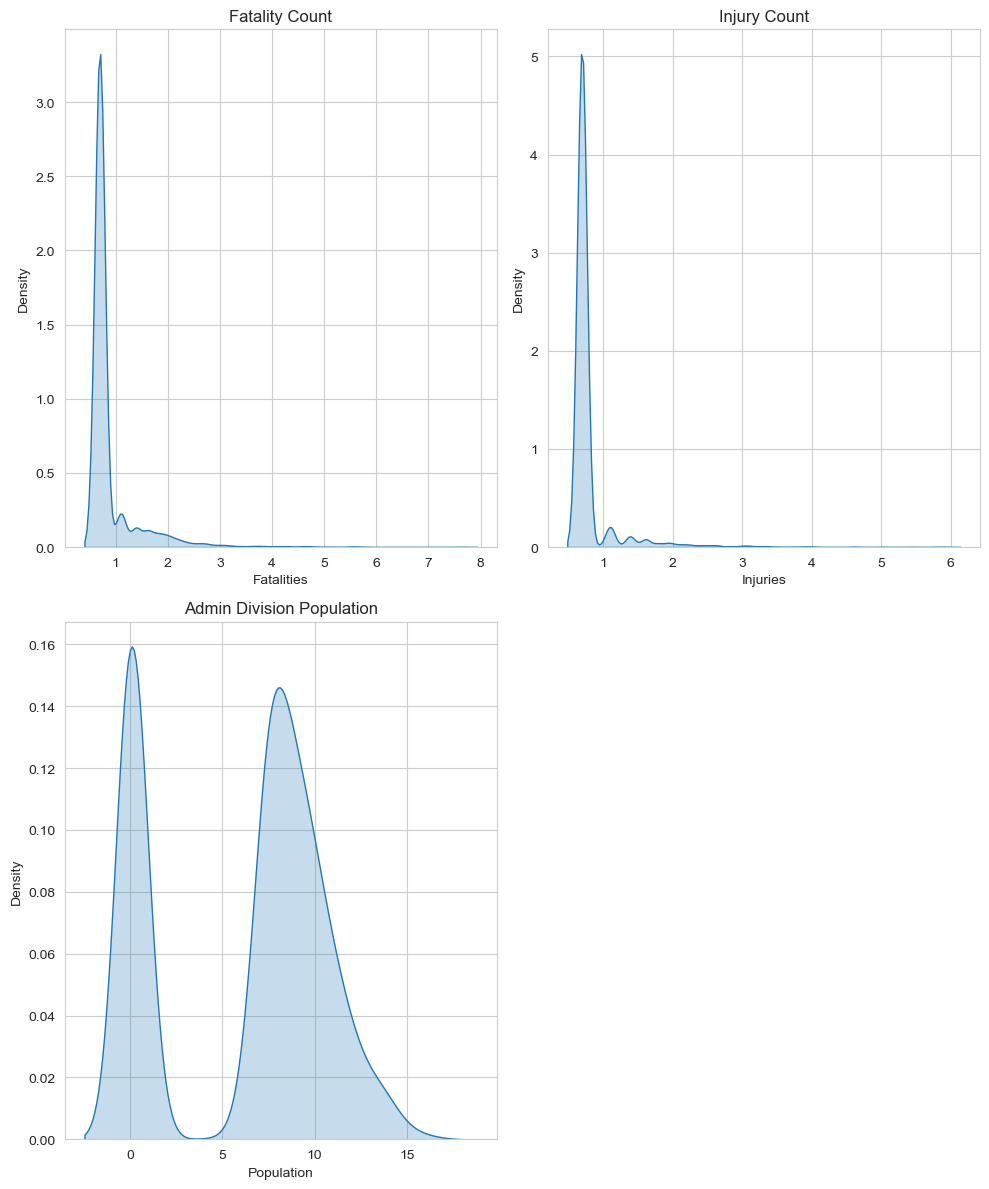

In [103]:
fig, axes = plt.subplots(2, 2, figsize = (10, 12))

sns.kdeplot(df['fatality_count'], ax = axes[0,0], fill = True)
axes[0,0].set_title("Fatality Count")
axes[0,0].set_xlabel("Fatalities")

sns.kdeplot(df['injury_count'], ax = axes[0,1], fill = True)
axes[0,1].set_title("Injury Count")
axes[0,1].set_xlabel("Injuries")

sns.kdeplot(df['admin_division_population'], ax = axes[1,0], fill = True)
axes[1,0].set_title("Admin Division Population")
axes[1,0].set_xlabel("Population")

axes[1,1].axis('off')

plt.tight_layout()
plt.show()

In [104]:
# Calculate the skew and kurtosis of the 'fatality_count' variable
fatality_skew = stats.skew(df['fatality_count'])
fatality_kurt = stats.kurtosis(df['fatality_count'])

# Calculate the skew and kurtosis of the 'injury_count' variable
injury_skew = stats.skew(df['injury_count'])
injury_kurt = stats.kurtosis(df['injury_count'])

population_skew = stats.skew(df['admin_division_population'])
population_kurt = stats.kurtosis(df['admin_division_population'])

# Print results
print(f"Skewness of fatality_count: {round(fatality_skew, 4)}")
print(f"Kurtosis of fatality_count: {round(fatality_kurt, 4)}\n")

print(f"Skewness of injury_count: {round(injury_skew, 4)}")
print(f"Kurtosis of injury_count: {round(injury_kurt, 4)}\n")

print(f"Skewness of admin_division_population: {round(population_skew, 4)}")
print(f"Kurtosis of admin_division_population: {round(population_kurt, 4)}")

Skewness of fatality_count: 4.1192
Kurtosis of fatality_count: 22.9825

Skewness of injury_count: 5.3041
Kurtosis of injury_count: 37.0206

Skewness of admin_division_population: -0.2962
Kurtosis of admin_division_population: -1.3743


After performing a log transformation we can see that the three variables are still skewed and significantly deviated from a normal distribution. After testing other scaling methods including max absolute scaling and seeing that a skew remained, we will have to reassess the scaling and transformations done on the data and potentially revisit the handling of outliers. 

### Visualizing Distributions of Categorical Data

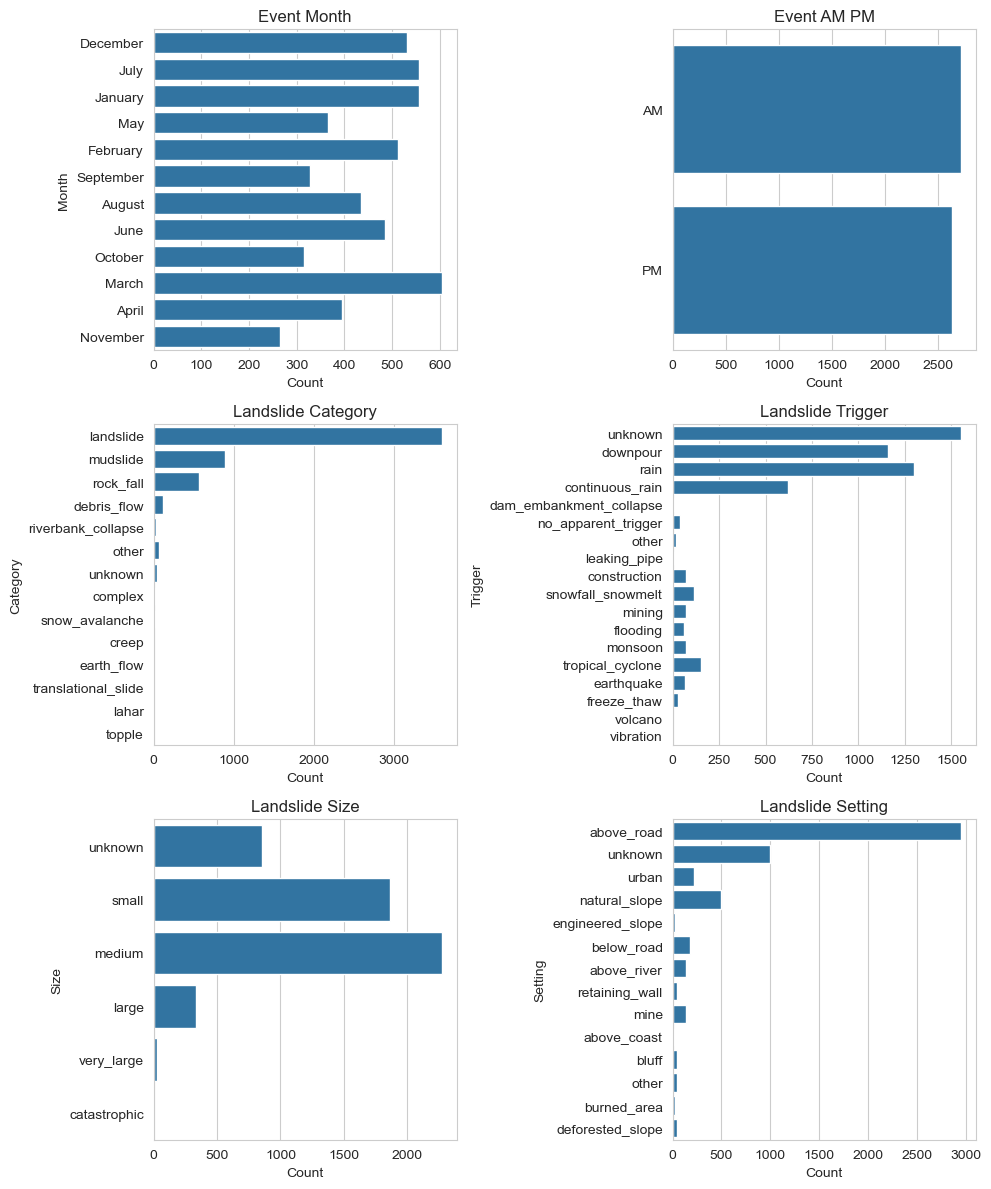

In [105]:
fig, axes = plt.subplots(3, 2, figsize = (10, 12))

sns.countplot(df, y = 'event_month', ax = axes[0,0])
axes[0,0].set_title("Event Month")
axes[0,0].set_xlabel("Count")
axes[0,0].set_ylabel("Month")

sns.countplot(df, y = 'event_am_pm', ax = axes[0,1])
axes[0,1].set_title("Event AM PM")
axes[0,1].set_xlabel("Count")
axes[0,1].set_ylabel("")

sns.countplot(df, y = 'landslide_category', ax = axes[1,0])
axes[1,0].set_title("Landslide Category")
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Category")

sns.countplot(df, y = 'landslide_trigger', ax = axes[1,1])
axes[1,1].set_title("Landslide Trigger")
axes[1,1].set_xlabel("Count")
axes[1,1].set_ylabel("Trigger")

sns.countplot(df, y = 'landslide_size', ax = axes[2,0])
axes[2,0].set_title("Landslide Size")
axes[2,0].set_xlabel("Count")
axes[2,0].set_ylabel("Size")

sns.countplot(df, y = 'landslide_setting', ax = axes[2,1])
axes[2,1].set_title("Landslide Setting")
axes[2,1].set_xlabel("Count")
axes[2,1].set_ylabel("Setting")

plt.tight_layout()
plt.show()


We can see that most of the categorical variables are dominated by a few categories in each variable.

### Assessing Data Relationships

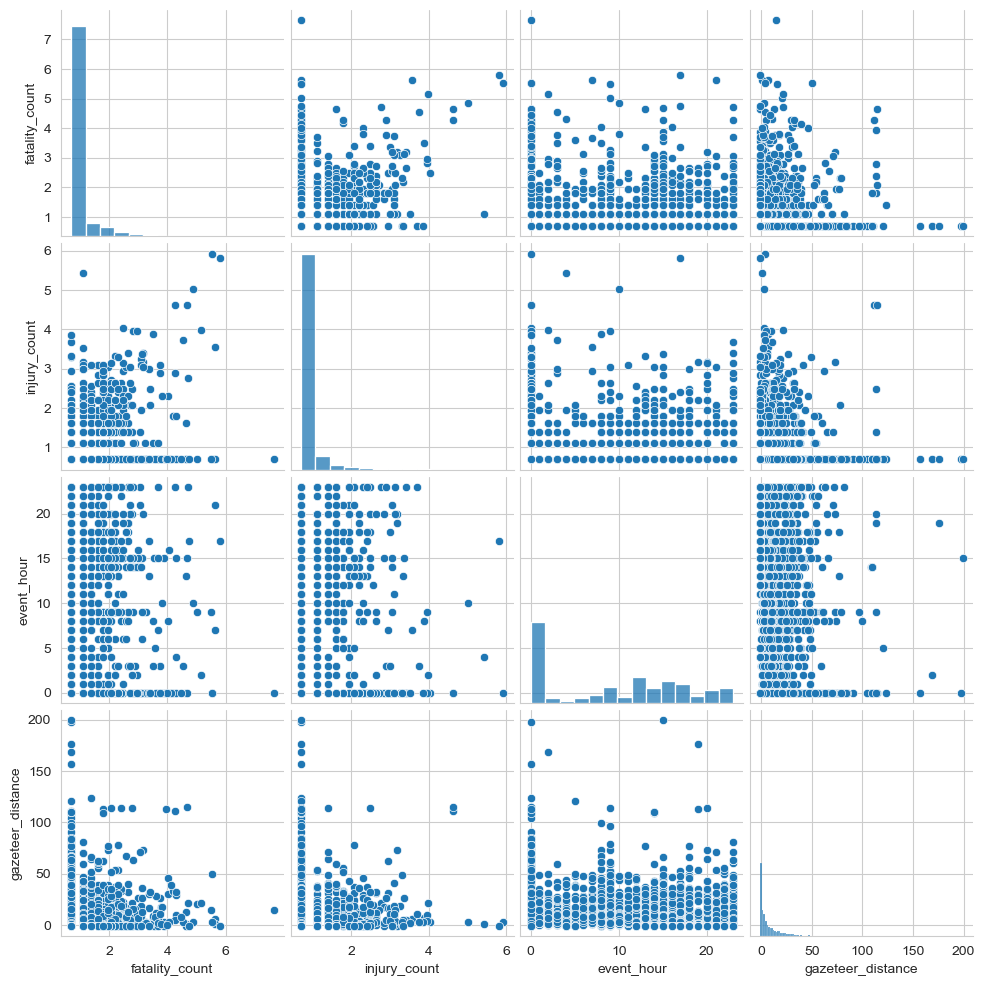

In [106]:
sns.pairplot(df[['fatality_count', 'injury_count', 'event_hour', 'gazeteer_distance']])
plt.show()

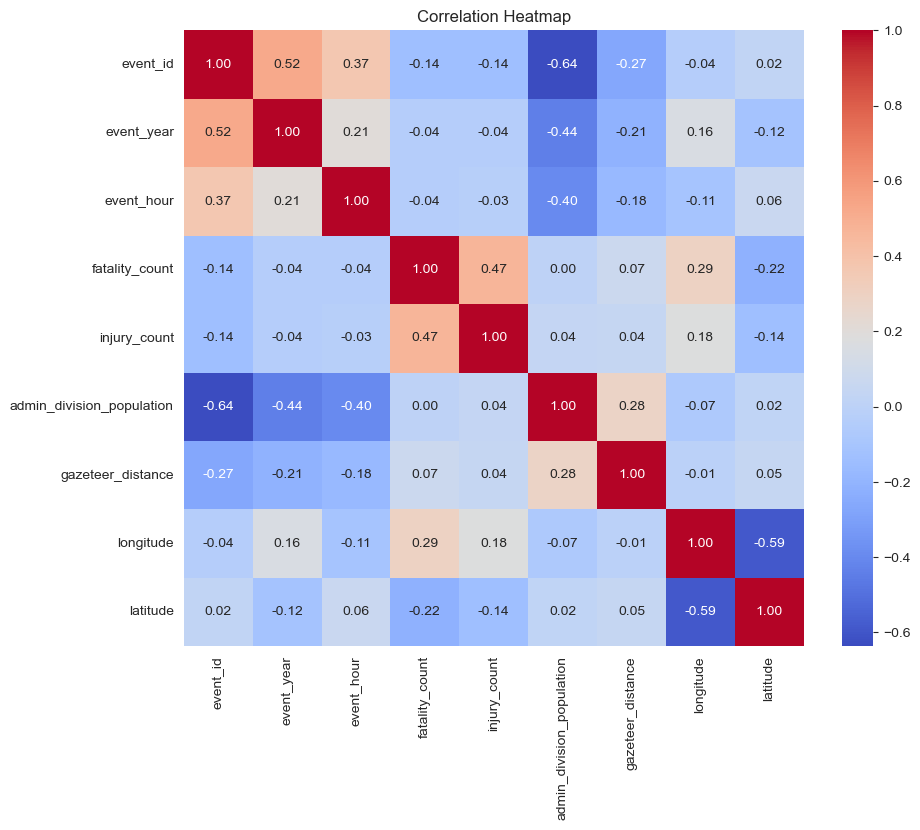

In [107]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

There does not appear to be any significant relationships between variables.

### Heat Map Representation of Landslide Occurences

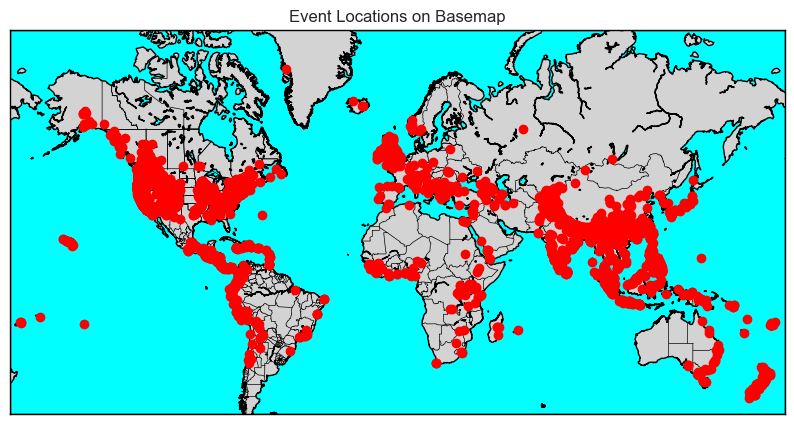

In [108]:

plt.figure(figsize=(10, 6))


m = Basemap(projection="merc", llcrnrlat=df["latitude"].min()-5, urcrnrlat=df["latitude"].max()+5,
            llcrnrlon=df["longitude"].min()-5, urcrnrlon=df["longitude"].max()+5, resolution="l")

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color="lightgray", lake_color="aqua")
m.drawmapboundary(fill_color="aqua")

# Convert latitude and longitude to map coordinates
x, y = m(df["longitude"].values, df["latitude"].values)

# Plot the points
m.scatter(x, y, marker="o", color="red", zorder=5)

# Add a title
plt.title("Event Locations on Basemap")

# Show the plot
plt.show()

We can see that landslides are most common the southern regions of Asia, the United States, and Europe while there are also a significant amount of occurrences along the east coast of South America, west coast of Australia, and parts of the African coast line. 
